# Chapter 10 - Random Processes and Monte Carlo Methods

Some processes in phiscs are random, like radioactive deacy. It's beliee to be impossible to predict when a particuarl radioactive atom will decay. Quantum meachinaics tell suse the probablilty of decay per unit time, but the exact moment of decay is random and cannot be calcuated.

## 10.1 Random Numbers

The "random" numbers generated by a computer are pseudorandom numbers. These are not really random at all, they only look random.

### 10.1.1 Random Number Generators

Consider x' = (ax + c)mod m, where a, c, and m are all constants. Given values for x, we can calculate x' then generate a new x' by plugging in x' for x. This generates a *linear congruential random number generator. Things to notice about this is that if we know a, c, m, and the starting value of x (the seed), we will produce the same result every time. Notice the numbers generated are always postive, and the choice for a, c, and m can affect the output. If c and m are both eve, the process would only generate even numbers. The main flaw is that the numbers generated are correlated to each other, but for most physics problems, it'snot an issue.

The code plotting the first 100 is below.

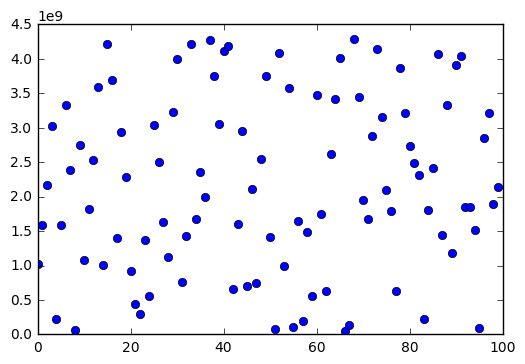

In [1]:
from pylab import plot,show

N = 100
a = 1664525
c = 1013904223
m = 4294967296
x = 1
results = []

for i in range(N):
    x = (a*x+c)%m
    results.append(x)
plot(results,"o")
show()


Typically a better choice of random number generator is called *Mersennne twister* which is a generalized feedack shift-register generator. This random number generator is utilized in the random package.

In [9]:
from random import random, randrange
n=3; m=0; k=1
random() # gives random float randomly distributed between 0 and 1.
randrange(n) # gives random integer from 0 to n-1
randrange(m,n) # gives random integer from m to n-1
randrange(m,n,k) # gives random integer in range m to n-1 with step-size k

2

#### Exercise 10.1 Rolling dice
**a)** Write a program to generate and print two random numbers between 1 and 6, to simulate the rolling of two dice.

**b)** Modify the program to simulate the rolling of two dice a million times and count the number of times you get a double six. Divide by a million to ge the fraction of times you get a double six. This number should be close to 1/36 (0.02777777777777777).

In [13]:
from random import random, randrange
# Part a
print('Part a')
print("First random number: " + str(randrange(1,7)))
print("Second random number: " + str(randrange(1,7)))

# Part b
print('\nPart b')
times = 1000000
ctTwoSix = 0
for i in range(times):
    first = randrange(1,7)
    second = randrange(1,7)
    if first==6 and second==6:
        ctTwoSix += 1

print(ctTwoSix/times)

Part a
First random number: 5
Second random number: 4

Part b
0.027632


### 10.1.2 Random Number Seeds

As we saw in the case of the linear conguential generate, a random number can have a seed--an input value that tells the generator where to start its sequence. Using the *Mersenne twister*, we can define a seed in the random package. One thing to note when using seeds is that these always generate the same numbers every time. This is useful to get a program to work or debugging.

In [15]:
from random import randrange, seed
seed(42)
for i in range(4):
    print(randrange(10))

1
0
4
3


### 10.1.3 Random Numbers and Secret Codes

This is an aside that talks about cryptography, one-time pads, and sending messages securely.

### Probabilities and Biased Coins

Say you want to have a coin flip only be heads 20% of the time. This can be done using the code below.

In [16]:
from random import random

if random()<0.2:
    print('Heads')
else:
    print('Tails')

Tails


#### Example 10.1 Decay of an Isotope

The probability of any simgle atom decaying is p(t) = 1-2<sup>-t/&tau;</sup>. The atoms decay is shown below. The blue line represents the atoms in <sup>208</sup>TI, and the green line represents the amount of <sup>208</sup>Pb.

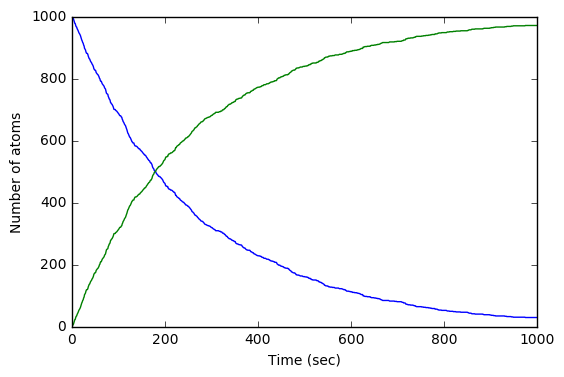

In [18]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NTl = 1000            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if random()<p:
            decay += 1
    NTl -= decay
    NPb += decay

# Make the graph
plot(tpoints,Tlpoints)
plot(tpoints,Pbpoints)
xlabel("Time (sec)")
ylabel("Number of atoms")
show()

#### Exercise 10.2 Radioactive decay chain

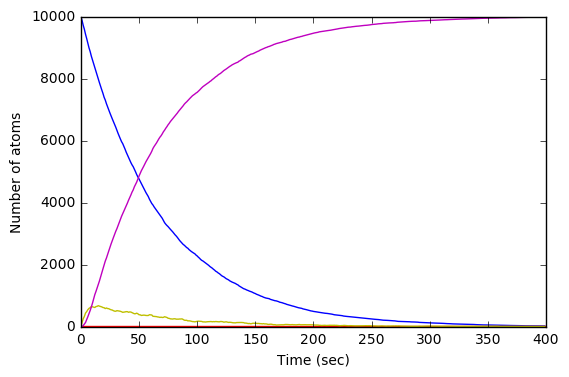

In [29]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NBi213 = 10000        # Number of Bi213 atoms
NTI = 0               # Number of TI209 atoms
NPb = 0               # Number of Pb atoms
NBi209 = 0            # Number of Bi209 atoms
tauBi213 = 46         # Half life of Bi213 
tauTI = 2.2           # Half life of TI209
tauPb = 3.3           # Half life of Pb209 
h = 1.0               # Size of time-step
pBi = 1 - 2**(-h/tauBi213) # Probability of decay from Bi213
pPb = 1 - 2**(-h/tauPb)    # Probability of decay from Pb209 to Bi209
pTI = 1 - 2**(-h/tauTI)    # Probability of decay from TI209 to Pb 209
pBitoPb = 0.9791
tmax = 400           # Total time in minutes

# Lists of plot points
tpoints = arange(0.0,tmax,h)    
Bi213points = []
Tlpoints = []
Pbpoints = []
Bi209points = []

# Main loop
for t in tpoints:
    Bi213points.append(NBi213)
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    Bi209points.append(NBi209)
    
    
    
    # Calculate the number of atoms that decay from PB
    decay = 0
    for i in range(NPb):
        if random()<pPb:
            decay += 1
    NPb -= decay
    NBi209 += decay
    
    # Calcuate the number of atoms that decay from TI
    decay = 0
    for i in range(NTI):
        if random()<pTI:
            decay +=1
    NTI -= decay
    NPb += decay
    
    # Calculate the number of atoms that decay from Bi213
    decayPb = 0
    decayTI = 0
    for i in range(NBi213):
        if random()<pBi:
            if random()<pBitoPb:
                decayPb += 1
            else:
                decayTI +=1
    NBi213 -= (decayPb+decayTI)
    NPb += decayPb
    NTI += decayTI

# Make the graph
plot(tpoints,Bi213points,color="b")
plot(tpoints,Tlpoints,color="r")
plot(tpoints,Pbpoints,color="y")
plot(tpoints,Bi209points, color = "m")
xlabel("Time (sec)")
ylabel("Number of atoms")
show()

#### Exercise 10.3 Brownian motion

#### 10.1.5  Nonuniform Random Numbers

Sometimes at the beginning we may want a probability to be skewed towards one number, and later on the probability skewed towards another number. This can be cone by choosing p(x) = &mu;e<sup>-&mu;x</sup>. Solving for x we get x = <sup>1</sup>&frasl;<sub>&mu;</sub> ln(1-z). So generate random numbers z in the interal from zero to one and feed them into the equation to get exponetially distributed *x* values.

#### Exercise 10.4 Radioactive decay again

### 10.1.6 Gaussian Random Number

A common problem is when numbers are drawn from a Normal (Gaussian) distribution. p(x) = <sup>1</sup>&frasl;<sub>&radic;2&pi;&sigma;<sup>2</sup></sub>exp(-<sup>x<sup>2</sup></sup>&frasl;<sub>2&sigma;<sup>2</sup></sub>). This can be put into cartesian coordinates and is "easily" handled.

#### Example 10.2 Rutherford Scattering

In [30]:
from math import sqrt,log,cos,sin,pi
from random import random

# Constants
Z = 79
e = 1.602e-19
E = 7.7e6*e
epsilon0 = 8.854e-12
a0 = 5.292e-11
sigma = a0/100
N = 1000000

# Function to generate two Gaussian random numbers
def gaussian():
    r = sqrt(-2*sigma*sigma*log(1-random()))
    theta = 2*pi*random()
    x = r*cos(theta)
    y = r*sin(theta)
    return x,y

# Main program
count = 0
for i in range(N):
    x,y = gaussian()
    b = sqrt(x*x+y*y)
    if b<Z*e*e/(2*pi*epsilon0*E):
        count += 1

print(count,"particles were reflected out of",N)

1506 particles were reflected out of 1000000


## 10.2 Monte Carlo Integration

We can also solve p(x) = <sup>1</sup>&frasl;<sub>&radic;2&pi;&sigma;<sup>2</sup></sub>exp(-<sup>x<sup>2</sup></sup>&frasl;<sub>2&sigma;<sup>2</sup></sub>) analytically, by integrating from 0 to b to get 1 - exp(-<sup>Z<sup>2</sup>e<sup>4</sup></sup>&frasl;<sub>8&pi;<sup>2</sup>&epsilon;<sub>0</sub><sup>2</sup>&sigma;<sup>2</sup>E<sup>2</sup></sub>). We can do this for many equations by starting with the exact process then find a suitable random process on the computer. This doesn't give us very accurate results, since P(k) is the binomial distribution and error &sigma; = A/N * &radic;var(k). This error is huge, so this method should be used only where other methods break down.

In [31]:
from math import sin
from random import random

def f(x):
    return (sin(1/(x*(2-x))))**2

N = 10000
count = 0
for i in range(N):
    x = 2*random()
    y = random()
    if y<f(x):
        count += 1
I = 2*count/N
print(I)

1.443


### 10.2.1 The Mean Value Method

This can be calcuated using he Monte Carlo Method. 

#### Exercise 10.5

#### 10.2.2 Integrals in Many Dimensions

Montecarlo methods work well with calculating integrals in many dimensions. I &approx; <sup>V</sup>&frasl;<sub>N</sub> &sigma; f(**r**<sub>i</sub>). Where **r**<sub>i</sub> are picked uniformly at random from the volume V.

#### Exercise 10.7 Volume of a hypersphere

### 10.2.3 Importance Sampling

Monte Carlo integration is useful for integrating pathologicla functions, but there are still some such functions for which it doesn't work well. For example, Fermi gases: 

I = &int;<sub>0</sub><sup>1</sup> &nbsp; [<sup>x<sup>-1/2</sup></sup>&frasl;<sub>e<sup>x</sup>+1</sub>dx]

To get around these problems, draw points *x<sub>i</sub>* non-uniformly from the integration interval.  This technique is called *importance sampling*.

#### Exercise 10.8 Calculate a value for the integral I = &int;<sub>0</sub><sup>1</sup> [<sup>x<sup>-1/2</sup></sup>&frasl;<sub>(e<sup>x</sup> + 1)</sub>dx]

## 10.3 Monte Carlo Simulation

This name is given to any computer simulation that uses random number to simulate a ranodm physical process in order to estimate something about the outocme of that porcess. This is used mostly in statistical mechanics.

### 10.3.1 Importance Sampling and Statistical Mechanics

Statistical mechanics importance is to calculate the average value of a quantity of interest in a phiscal system in thermal equilibrium at temperature *T*. All we know is that at any particular moment the probablility of it occupying state *i* with energy *E<sub>i</sub>* is given be the Boltmann formula P(E<sub>i</sub>) = <sup>e<sup>-&beta;E<sub>i</sub></sup></sup> &frasl; <sub>Z</sub>, with Z = &Sigma;<sub>all i</sub> [e<sup>-&beta;E<sub>i</sub></sup>]. Where &beta = 1/k<sub>B</sub>T and k<sub>B</sub> is Boltzmann's constant. Then the average value of a quantity *X* that takes the value *X<sub>i</sub>* in the ith that is &lt;X> = &Sigma;<sub>i  X<sub>i</sub>P(E<sub>i</sub>)</sub>. Typically the number of states is extremely large, and evaluating them would take a long time. So instead, we can use the Monte Carlo approximation with

&lt;X> &approx; <sup>&Sigma;<sub>k=1</sub><sup>N</sup> [X<sub>k</sub>P(E<sub>k</sub>)]</sup> &frasl; <sub>&Sigma;<sub>k=1</sub><sup>N</sup>  [P(E<sub>k</sub>)]</sub>.

Notice that the centric enegy states are much more probable, so we need to use importance sampling.

### 10.3.2 The Markov Chain Method

How to choose states with probability P(E<sub>i</sub>). We can do this without knowing the partition function, using a device called a *Markov chain*. Consider a single step process and suppose that eh previous state in the chain, the state for the step beore this one was state *i*. For the new stae, instead of choosing ranndomly from all possible states, make a (typically small) change to *i* as to create a new state. If the system we are styding is a gas, for instancewe might move one of the molecules in the gas to a new quantum level, but leave the other molecules where they are. The choice of the new state is determined probabilisticall by a set of *transition probabilities* T<sub>ij</sub>, that give the proability of changing from state *i* to state *j*. If choose a *T<sub>ij<sub>* right for all i and j , we can arragne theat the probability of visiting any particular state on any step of the Markov chain is precisely the Boltmann probability *P(E<sub>i</sub>), so that when we take many steps and generate the entire chaing the complete set of states that we move through is a correct sample of the Boltmann distribution. Given that, we must end up in some state on every step of the Markov chain such that

&Sigma;<sub>j</sub> [T<sub>ij</sub>] = 1

<sup>T<sub>ij</sub></sup> &frasl; <sub>T<sub>ji</sub></sub> = 
<sup>P(E<sub>j</sub>)</sup> &frasl; <sub>P(E<sub>i</sub>)</sub> = 
<sup>e<sup>-&beta;E<sub>j</sub></sup>/Z</sup> &frasl; <sub>e<sup>-&beta;E<sub>j</sub></sup>/Z</sub> = 
e<sup>-&beta;(E<sub>j</sub>-E<sub>i</sub>)</sup>

Also, we know &Sigma;<sub>i</sub>T<sub>ij</sub>P(E<sub>i</sub>) = P(E<sub>j</sub>)

**Metropolis Algorithm**
Suppose that the previous state in teh chain is state *i* and we generate a new state *j* by making some change to state *i*. We will choose the particular change we make univeromly at rendom form a specified set of possible changes (a move set). Then, either accept or reject the new state with acceptance probability P<sub>a</sub> given by:

P<sub>a</sub> = {1 if E<sub>j</sub> &le; E<sub>i</sub> or e<sup>-&beta;(E<sub>j</sub>- E<sub>i</sub>)</sup> otherwise.If the move is reject, do nothing. Else, change the system to the new state.

**Markov cahin Monte Carlo sumulation**
<ol>
    <li> Choose random stating state.
    <li> Choose a move uniformly at random from an allowed set of moves.
    <li> Calculate the value of the acceptance probability *P<sub>a</sub>* given in Eq. 10.60.
    <li> With prob. *P<sub>a</sub>* accept the move, changing the state of the system to the new state; otherwise reject it keeping the state the same for another calculation step.
    <li> Measure the value of the qunatity of interest *X* in the current state and add it to a running sum of such measurements.
    <li> Repeat from step 2.
</ol>
When we have done many such steps, take the sunning sum and divide it by the total number of step taken.

#### Example 10.3 Monte Carlo Simulation of an ideal Gas

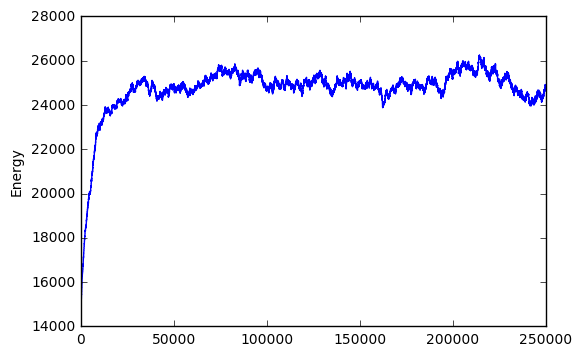

In [32]:
from random import random,randrange
from math import exp,pi
from numpy import ones
from pylab import plot,ylabel,show

T = 10.0
N = 1000
steps = 250000

# Create a 2D array to store the quantum numbers
n = ones([N,3],int)

# Main loop
eplot = []
E = 3*N*pi*pi/2
for k in range(steps):

    # Choose the particle and the move
    i = randrange(N)
    j = randrange(3)
    if random()<0.5:
        dn = 1
        dE = (2*n[i,j]+1)*pi*pi/2
    else:
        dn = -1
        dE = (-2*n[i,j]+1)*pi*pi/2

    # Decide whether to accept the move
    if n[i,j]>1 or dn==1:
        if random()<exp(-dE/T):
            n[i,j] += dn
            E += dE

    eplot.append(E)

# Make the graph
plot(eplot)
ylabel("Energy")
show()

#### Exercise 10.9 The Ising Model

## 10.4 Simulated Annealing